## Feature Extraction:

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
# Importing dataset
df=pd.read_csv('preprocessed_data.csv') 
df.head(3)

,title,id,author,url,score,subreddit,over_18,selftext,is_suicide,title_clean,selftext_clean,titlelen,selftextlen,title_n_words,selftext_n_words
0,It’s kinda funny how quickly one can go from “...,ma96y1,cwbrumm,https://www.reddit.com/r/SuicideWatch/comments...,3802,SuicideWatch,False,empty post,1,kinda funny quickly one go today wa great prod...,empty post,89,10,15,2
1,“If you truly wanted to kill yourself and wasn...,greo4o,Oels2,https://www.reddit.com/r/SuicideWatch/comments...,3376,SuicideWatch,False,"Yeah because I DONT WANT TO FUCKING DO IT, but...",1,truly wanted kill seeking attention tell one o...,yeah dont want fucking option want feeling sto...,59,297,10,48
2,Anyone else not want to die and not want to ki...,f9d5go,cleopatra_97,https://www.reddit.com/r/SuicideWatch/comments...,3029,SuicideWatch,False,empty post,1,anyone else want die want kill wish could stop...,empty post,55,10,10,2


Before moving to feature extraction , we remove some features from the data that we think does not affect the result of the output. these features are : id , url , subreddit [as we already have is_suicide feature] and title and selftext because we already have preprocessed title and selftext

In [9]:
df = df.drop(columns=['id', 'url' , 'subreddit', 'title' , 'selftext'])
df.head(3)

,author,score,over_18,is_suicide,title_clean,selftext_clean,titlelen,selftextlen,title_n_words,selftext_n_words
0,cwbrumm,3802,False,1,kinda funny quickly one go today wa great prod...,empty post,89,10,15,2
1,Oels2,3376,False,1,truly wanted kill seeking attention tell one o...,yeah dont want fucking option want feeling sto...,59,297,10,48
2,cleopatra_97,3029,False,1,anyone else want die want kill wish could stop...,empty post,55,10,10,2


In [10]:
df['over_18'] = np.where(df['over_18']!= 'False', 1, 0)
df.head()

,author,score,over_18,is_suicide,title_clean,selftext_clean,titlelen,selftextlen,title_n_words,selftext_n_words
0,cwbrumm,3802,1,1,kinda funny quickly one go today wa great prod...,empty post,89,10,15,2
1,Oels2,3376,1,1,truly wanted kill seeking attention tell one o...,yeah dont want fucking option want feeling sto...,59,297,10,48
2,cleopatra_97,3029,1,1,anyone else want die want kill wish could stop...,empty post,55,10,10,2
3,_crustysocks_,2867,1,1,mom died 3 hour ago,thought id ready day realized thats impossible...,19,572,5,92
4,Fantastic-Profession,2821,1,1,raped front girlfriend feeling like giving,know say feel like life falling apart three we...,42,1930,6,293


In [15]:
y = df['is_suicide']
X = df.drop('is_suicide', axis = 1)

In [17]:
# Splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
X_train.shape

(3132, 9)

### TF - IDF:

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = TfidfVectorizer(lowercase=False,)
X_tfidf_train = vectorizer.fit_transform(X_train['selftext_clean'].values.astype('U'))
X_tfidf_test = vectorizer.transform(X_test['selftext_clean'].values.astype('U'))

In [25]:
word2tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))

### Bag of Words:

In [33]:
count_vect = CountVectorizer() #in scikit-learn
X_bag_of_words_train = count_vect.fit_transform(X_train['selftext_clean'].values.astype('U'))
X_bag_of_words_test = count_vect.transform(X_test['selftext_clean'].values.astype('U'))

### TF - IDF N-Grams:

In [35]:
vectorizer_n12 = TfidfVectorizer(lowercase=False,ngram_range = (1,2))
X_tfidf_train_n12 = vectorizer_n12.fit_transform(X_train['selftext_clean'].values.astype('U'))
X_tfidf_test_n12 = vectorizer_n12.transform(X_test['selftext_clean'].values.astype('U'))

### Feature Selection: 

for feature selection we used linearSVC which has l1 normalization penality which deals with sparse matrix 

In [40]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

## TF - IDF 
lm = LinearSVC(penalty='l1', dual=False)
lm.fit(X_tfidf_train, y_train)
best_features = SelectFromModel(lm , prefit = True)
X_selected_features = best_features.transform(X_tfidf_train)
X_test_selected_features = best_features.transform(X_tfidf_test)

In [41]:
#TF- IDF n - grams
lm.fit(X_tfidf_train_n12, y_train)
best_features_n12 = SelectFromModel(linear_model, prefit=True)
X_selected_features_n12 = best_features_n12.transform(X_tfidf_train_n12)
X_test_selected_features_n12 = best_features_n12.transform(X_tfidf_test_n12)

/Users/aniket/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [42]:
#Bag of Words
lm.fit(X_bag_of_words_train, y_train)
best_features_bow = SelectFromModel(linear_model, prefit=True)
X_selected_features_bow = best_features_bow.transform(X_bag_of_words_train)
X_test_selected_features_bow = best_features_bow.transform(X_bag_of_words_test)

/Users/aniket/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [106]:
k3 = pd.DataFrame(X_selected_features.toarray())
k3.head()

,0,1,2,3,4,5,6,7,8,9,...,932,933,934,935,936,937,938,939,940,941
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.095254,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.082368,0.0,0.0,0.053077,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.080152,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Modelling

#### 1) Linear SVM with hyperparamter tuning

a) TF - IDF 

In [80]:
import seaborn as sns

def plot_confusionmatrix(test_y, predict_y):
    matrix1 = confusion_matrix(test_y, predict_y)
    
    matrix2 =(((matrix1.T)/(matrix1.sum(axis=1))).T)
    
    matrix3 =(matrix1/matrix1.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(matrix1, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(matrix3, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    
    # representing B in heatmap format
    sns.heatmap(matrix2, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

For values of alpha =  1e-05 The log loss is: 0.6715268700382572
For values of alpha =  0.0001 The log loss is: 0.626975170541489
For values of alpha =  0.001 The log loss is: 0.5924760949642704
For values of alpha =  0.01 The log loss is: 0.6710671260291691
For values of alpha =  0.1 The log loss is: 0.6933206436970489
For values of alpha =  1 The log loss is: 0.6933206436970494
For values of alpha =  10 The log loss is: 0.6933206436970494


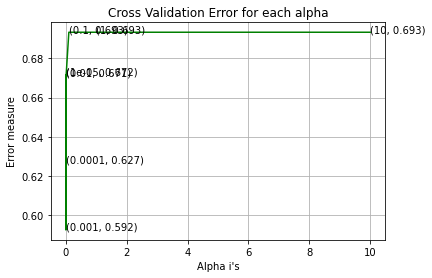

For values of best alpha =  0.001 The train log loss is: 0.5679226864769348
For values of best alpha =  0.001 The test log loss is: 0.5924760949642704
Total number of data points : 784


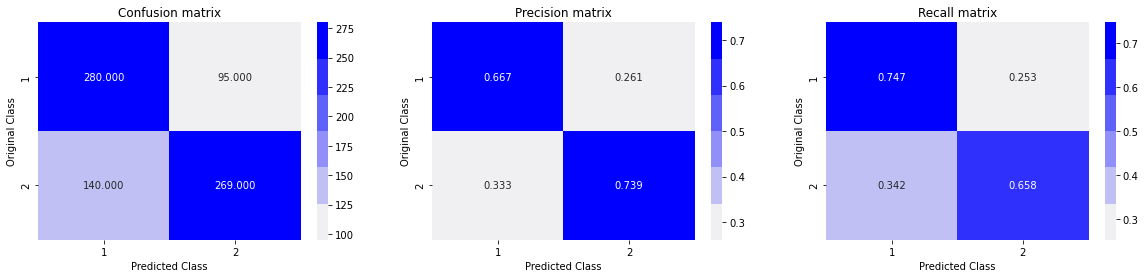

In [81]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix


alpha = [10 ** x for x in range(-5, 2)] 

#TF-IDF
error = []
for i in alpha:
    classifier = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=50)
    classifier.fit(X_selected_features, y_train)
    sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_classifier.fit(X_selected_features, y_train)
    predict_y = sig_classifier.predict_proba(X_test_selected_features)
    error.append(log_loss(y_test, predict_y, labels=classifier.classes_))
    
best_alpha = np.argmin(error)
classifier = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=50)
classifier.fit(X_selected_features, y_train)
sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sig_classifier.fit(X_selected_features, y_train)

plot_confusionmatrix(y_test, predicted_y)

In [83]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn import metrics

results = metrics.precision_recall_fscore_support(y_test, predicted_y)
accuracy = metrics.accuracy_score(y_test, predicted_y)

print("Precision: " , results[0][0])
print("Recall: ", results[1][0])
print("F1-score: ", results[2][0])
print("accuracy: ", accuracy)

Precision:  0.6666666666666666
Recall:  0.7466666666666667
F1-score:  0.7044025157232704
accuracy:  0.7002551020408163


b) Bag of Words:

For values of alpha =  1e-05 The log loss is: 0.6519344999841037


/Users/aniket/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


For values of alpha =  0.0001 The log loss is: 0.6608989173833272


/Users/aniket/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


For values of alpha =  0.001 The log loss is: 0.6494178392637007
For values of alpha =  0.01 The log loss is: 0.6509986871357442
For values of alpha =  0.1 The log loss is: 0.6718476281861111
For values of alpha =  1 The log loss is: 0.6907753115225741
For values of alpha =  10 The log loss is: 0.6933206436970494


/Users/aniket/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


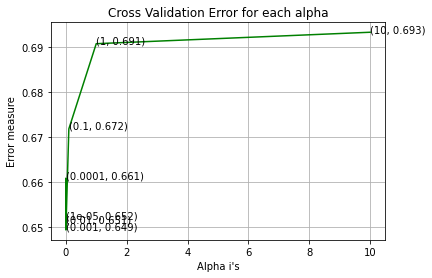

/Users/aniket/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


For values of best alpha =  0.001 The train log loss is: 0.5647623158021833
For values of best alpha =  0.001 The test log loss is: 0.6494178392637007
Total number of data points : 784


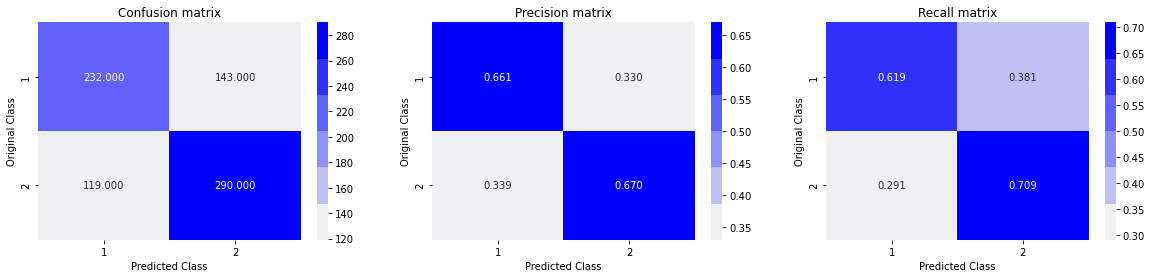

In [84]:
#Bag - Of - Words
log_error_array=[]
error = []
for i in alpha:
    classifier = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=50)
    classifier.fit(X_selected_features_bow, y_train)
    sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_classifier.fit(X_selected_features_bow, y_train)
    predict_y = sig_classifier.predict_proba(X_test_selected_features_bow)
    error.append(log_loss(y_test, predict_y, labels=classifier.classes_))
    
best_alpha = np.argmin(error)
classifier = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=50)
classifier.fit(X_selected_features_bow, y_train)
sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sig_classifier.fit(X_selected_features_bow, y_train)

plot_confusionmatrix(y_test, predicted_y)

In [85]:
results = metrics.precision_recall_fscore_support(y_test, predicted_y)
accuracy = metrics.accuracy_score(y_test, predicted_y)

print("Precision: " , results[0][0])
print("Recall: ", results[1][0])
print("F1-score: ", results[2][0])
print("accuracy: ", accuracy)

Precision:  0.6609686609686609
Recall:  0.6186666666666667
F1-score:  0.6391184573002755
accuracy:  0.6658163265306123


c) N - Grams TF - IDF:

For values of alpha =  1e-05 The log loss is: 0.7451256809650758
For values of alpha =  0.0001 The log loss is: 0.6262526428688607
For values of alpha =  0.001 The log loss is: 0.6125443761938731
For values of alpha =  0.01 The log loss is: 0.678692700405619
For values of alpha =  0.1 The log loss is: 0.6933206436970489
For values of alpha =  1 The log loss is: 0.6933206436970494
For values of alpha =  10 The log loss is: 0.6933206436970494


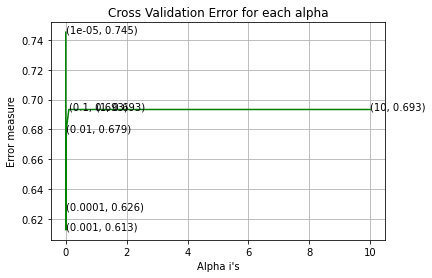

For values of best alpha =  0.001 The train log loss is: 0.6047959849723835
For values of best alpha =  0.001 The test log loss is: 0.6125443761938731
Total number of data points : 784


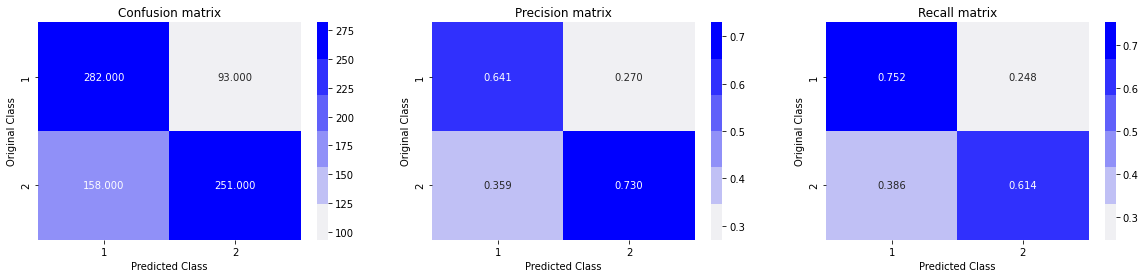

In [86]:
error = []
for i in alpha:
    classifier = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=50)
    classifier.fit(X_selected_features_n12, y_train)
    sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_classifier.fit(X_selected_features_n12, y_train)
    predict_y = sig_classifier.predict_proba(X_test_selected_features_n12)
    error.append(log_loss(y_test, predict_y, labels=classifier.classes_))
    
best_alpha = np.argmin(error)
classifier = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=50)
classifier.fit(X_selected_features_n12, y_train)
sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sig_classifier.fit(X_selected_features_n12, y_train)

plot_confusionmatrix(y_test, predicted_y)

In [87]:
results = metrics.precision_recall_fscore_support(y_test, predicted_y)
accuracy = metrics.accuracy_score(y_test, predicted_y)

print("Precision: " , results[0][0])
print("Recall: ", results[1][0])
print("F1-score: ", results[2][0])
print("accuracy: ", accuracy)

Precision:  0.6409090909090909
Recall:  0.752
F1-score:  0.6920245398773006
accuracy:  0.6798469387755102


#### 2. Logistic Regression with Hyperparameter tuning

a) TD - IDF

For values of alpha =  1e-05 The log loss is: 0.6676205773584695
For values of alpha =  0.0001 The log loss is: 0.6147667702772773
For values of alpha =  0.001 The log loss is: 0.5988073682058277
For values of alpha =  0.01 The log loss is: 0.6298940593819495
For values of alpha =  0.1 The log loss is: 0.6520095790463979
For values of alpha =  1 The log loss is: 0.6556029458414506
For values of alpha =  10 The log loss is: 0.6559504810456894


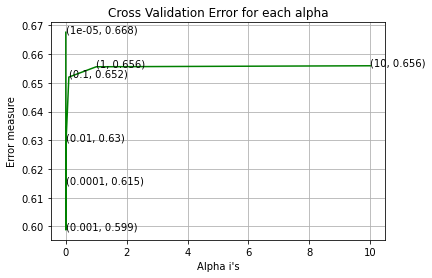

For values of best alpha =  0.001 The train log loss is: 0.5147785675124463
For values of best alpha =  0.001 The test log loss is: 0.5988073682058277
Total number of data points : 784


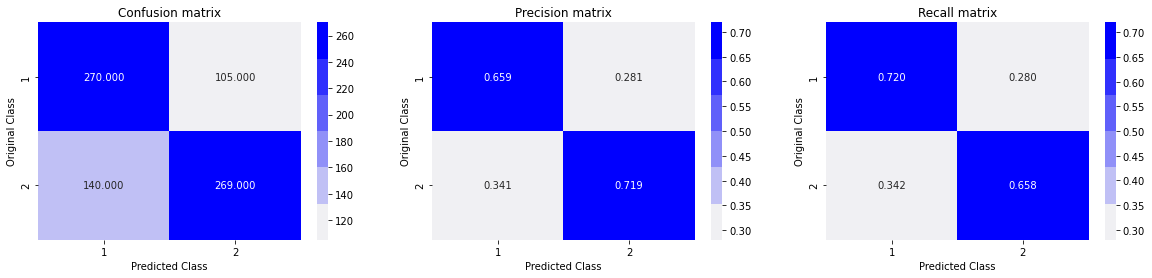

In [89]:
error = []
for i in alpha:
    classifier = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=50)
    classifier.fit(X_selected_features, y_train)
    sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_classifier.fit(X_selected_features, y_train)
    predict_y = sig_classifier.predict_proba(X_test_selected_features)
    error.append(log_loss(y_test, predict_y, labels=classifier.classes_))
    
best_alpha = np.argmin(error)
classifier = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=50)
classifier.fit(X_selected_features, y_train)
sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sig_classifier.fit(X_selected_features, y_train)

plot_confusionmatrix(y_test, predicted_y)

In [90]:
results = metrics.precision_recall_fscore_support(y_test, predicted_y)
accuracy = metrics.accuracy_score(y_test, predicted_y)

print("Precision: " , results[0][0])
print("Recall: ", results[1][0])
print("F1-score: ", results[2][0])
print("accuracy: ", accuracy)

Precision:  0.6585365853658537
Recall:  0.72
F1-score:  0.6878980891719746
accuracy:  0.6875


b) Bag of Words:

For values of alpha =  1e-05 The log loss is: 0.6465807697887553
For values of alpha =  0.0001 The log loss is: 0.6447454411565253
For values of alpha =  0.001 The log loss is: 0.6353081292075844
For values of alpha =  0.01 The log loss is: 0.6168581690549325
For values of alpha =  0.1 The log loss is: 0.6242250157881455
For values of alpha =  1 The log loss is: 0.6450058736120813
For values of alpha =  10 The log loss is: 0.6730774225357676


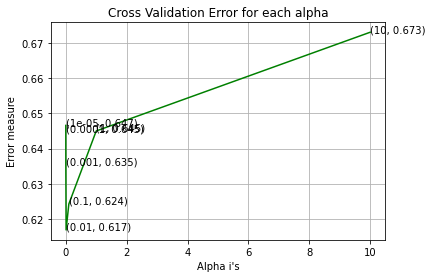

For values of best alpha =  0.01 The train log loss is: 0.5325664432111011
For values of best alpha =  0.01 The test log loss is: 0.6168581690549325
Total number of data points : 784


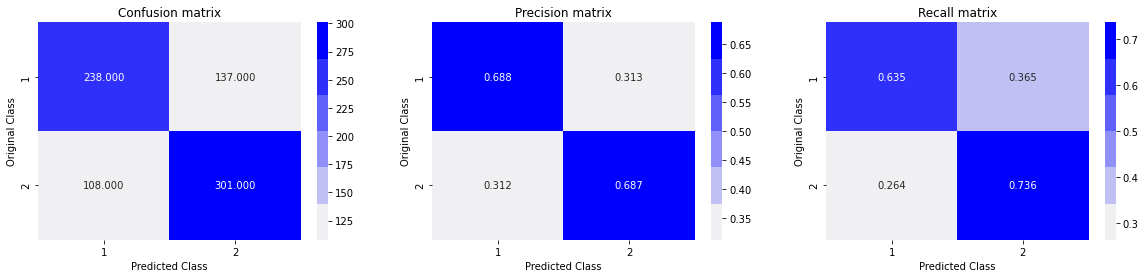

In [91]:

#Bag of Words: 
error = []
for i in alpha:
    classifier = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=50)
    classifier.fit(X_selected_features_bow, y_train)
    sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_classifier.fit(X_selected_features_bow, y_train)
    predict_y = sig_classifier.predict_proba(X_test_selected_features_bow)
    error.append(log_loss(y_test, predict_y, labels=classifier.classes_))
    
best_alpha = np.argmin(error)
classifier = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=50)
classifier.fit(X_selected_features_bow, y_train)
sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sig_classifier.fit(X_selected_features_bow, y_train)

plot_confusionmatrix(y_test, predicted_y)

In [92]:
results = metrics.precision_recall_fscore_support(y_test, predicted_y)
accuracy = metrics.accuracy_score(y_test, predicted_y)

print("Precision: " , results[0][0])
print("Recall: ", results[1][0])
print("F1-score: ", results[2][0])
print("accuracy: ", accuracy)

Precision:  0.6878612716763006
Recall:  0.6346666666666667
F1-score:  0.6601941747572816
accuracy:  0.6875


c) N - Grams TF - IDF 

For values of alpha =  1e-05 The log loss is: 0.6988416628711822
For values of alpha =  0.0001 The log loss is: 0.6149810735866815
For values of alpha =  0.001 The log loss is: 0.6126160305949133
For values of alpha =  0.01 The log loss is: 0.6537921675211479
For values of alpha =  0.1 The log loss is: 0.6673020174918645
For values of alpha =  1 The log loss is: 0.6682888751982068
For values of alpha =  10 The log loss is: 0.6683874217809825


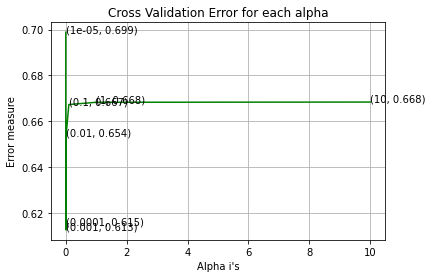

For values of best alpha =  0.001 The train log loss is: 0.5761513497978012
For values of best alpha =  0.001 The test log loss is: 0.6126160305949133
Total number of data points : 784


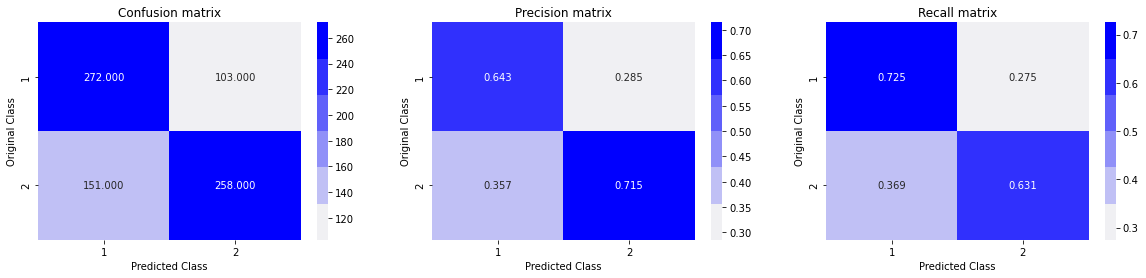

In [93]:
alpha = [10 ** x for x in range(-5, 2)] 

#TF-IDF
error = []
for i in alpha:
    classifier = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=50)
    classifier.fit(X_selected_features_n12, y_train)
    sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
    sig_classifier.fit(X_selected_features_n12, y_train)
    predict_y = sig_classifier.predict_proba(X_test_selected_features_n12)
    error.append(log_loss(y_test, predict_y, labels=classifier.classes_))
    
best_alpha = np.argmin(error)
classifier = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=50)
classifier.fit(X_selected_features_n12, y_train)
sig_classifier = CalibratedClassifierCV(classifier, method="sigmoid")
sig_classifier.fit(X_selected_features_n12, y_train)

plot_confusionmatrix(y_test, predicted_y)

In [94]:
results = metrics.precision_recall_fscore_support(y_test, predicted_y)
accuracy = metrics.accuracy_score(y_test, predicted_y)

print("Precision: " , results[0][0])
print("Recall: ", results[1][0])
print("F1-score: ", results[2][0])
print("accuracy: ", accuracy)

Precision:  0.6430260047281324
Recall:  0.7253333333333334
F1-score:  0.6817042606516291
accuracy:  0.6760204081632653


#### 3) XGBoost :

TF - IDF:

In [97]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.01
params['max_depth'] = 6

d_train = xgb.DMatrix(X_selected_features, label=y_train)
d_test = xgb.DMatrix(X_test_selected_features, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=25, verbose_eval=15)

xgdmat = xgb.DMatrix(X_selected_features,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))

[0]	train-logloss:0.69007	valid-logloss:0.69058
[10]	train-logloss:0.66494	valid-logloss:0.67079
[20]	train-logloss:0.64651	valid-logloss:0.65820
[30]	train-logloss:0.63198	valid-logloss:0.64947
[40]	train-logloss:0.62030	valid-logloss:0.64329
[50]	train-logloss:0.60964	valid-logloss:0.63799
[60]	train-logloss:0.60001	valid-logloss:0.63404
[70]	train-logloss:0.59127	valid-logloss:0.62992
[80]	train-logloss:0.58338	valid-logloss:0.62642
[90]	train-logloss:0.57643	valid-logloss:0.62353
[100]	train-logloss:0.56976	valid-logloss:0.62097
[110]	train-logloss:0.56397	valid-logloss:0.61860
[120]	train-logloss:0.55820	valid-logloss:0.61604
[130]	train-logloss:0.55306	valid-logloss:0.61402
[140]	train-logloss:0.54850	valid-logloss:0.61266
[150]	train-logloss:0.54412	valid-logloss:0.61149
[160]	train-logloss:0.53975	valid-logloss:0.61014
[170]	train-logloss:0.53565	valid-logloss:0.60928
[180]	train-logloss:0.53179	valid-logloss:0.60868
[190]	train-logloss:0.52801	valid-logloss:0.60776
[200]	train

Total number of data points : 784


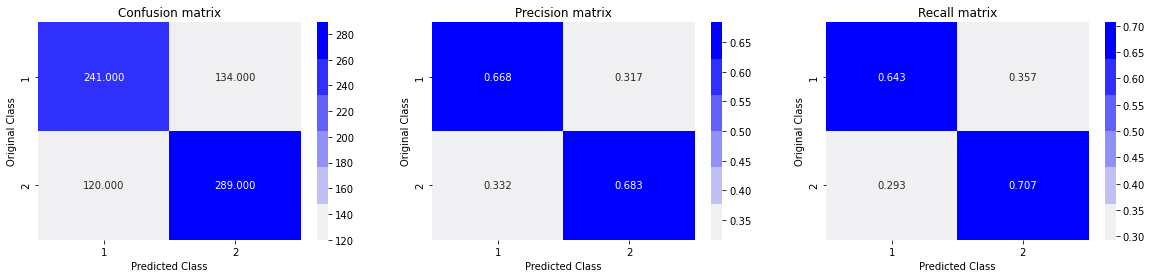

In [101]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusionmatrix(y_test, predicted_y)

In [102]:
results = metrics.precision_recall_fscore_support(y_test, predicted_y)
accuracy = metrics.accuracy_score(y_test, predicted_y)

print("Precision: " , results[0][0])
print("Recall: ", results[1][0])
print("F1-score: ", results[2][0])
print("accuracy: ", accuracy)

Precision:  0.667590027700831
Recall:  0.6426666666666667
F1-score:  0.6548913043478262
accuracy:  0.6760204081632653


In [107]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.01
params['max_depth'] = 6

d_train = xgb.DMatrix(X_selected_features_bow, label=y_train)
d_test = xgb.DMatrix(X_test_selected_features_bow, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=25, verbose_eval=15)

xgdmat = xgb.DMatrix(X_selected_features_bow,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))

[0]	train-logloss:0.69021	valid-logloss:0.69084
[10]	train-logloss:0.66620	valid-logloss:0.67283
[20]	train-logloss:0.64890	valid-logloss:0.66126
[30]	train-logloss:0.63543	valid-logloss:0.65265
[40]	train-logloss:0.62463	valid-logloss:0.64619
[50]	train-logloss:0.61523	valid-logloss:0.64101
[60]	train-logloss:0.60695	valid-logloss:0.63617
[70]	train-logloss:0.59972	valid-logloss:0.63284
[80]	train-logloss:0.59326	valid-logloss:0.63014
[90]	train-logloss:0.58720	valid-logloss:0.62817
[100]	train-logloss:0.58131	valid-logloss:0.62640
[110]	train-logloss:0.57619	valid-logloss:0.62499
[120]	train-logloss:0.57166	valid-logloss:0.62322
[130]	train-logloss:0.56720	valid-logloss:0.62199
[140]	train-logloss:0.56235	valid-logloss:0.62068
[150]	train-logloss:0.55799	valid-logloss:0.61951
[160]	train-logloss:0.55385	valid-logloss:0.61826
[170]	train-logloss:0.54984	valid-logloss:0.61684
[180]	train-logloss:0.54619	valid-logloss:0.61556
[190]	train-logloss:0.54262	valid-logloss:0.61462
[200]	train

Total number of data points : 784


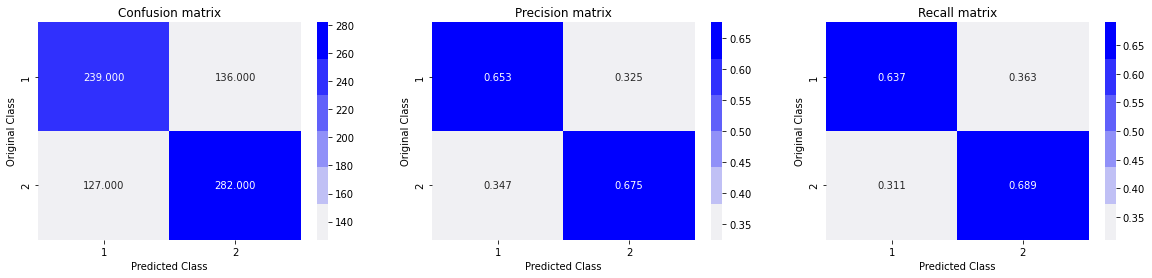

In [108]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusionmatrix(y_test, predicted_y)

In [109]:
results = metrics.precision_recall_fscore_support(y_test, predicted_y)
accuracy = metrics.accuracy_score(y_test, predicted_y)

print("Precision: " , results[0][0])
print("Recall: ", results[1][0])
print("F1-score: ", results[2][0])
print("accuracy: ", accuracy)

Precision:  0.6530054644808743
Recall:  0.6373333333333333
F1-score:  0.6450742240215924
accuracy:  0.6645408163265306


In [110]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.01
params['max_depth'] = 6

d_train = xgb.DMatrix(X_selected_features_n12, label=y_train)
d_test = xgb.DMatrix(X_test_selected_features_n12, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 500, watchlist, early_stopping_rounds=25, verbose_eval=15)

xgdmat = xgb.DMatrix(X_selected_features_n12,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_))

[0]	train-logloss:0.69010	valid-logloss:0.69076
[10]	train-logloss:0.66510	valid-logloss:0.67177
[20]	train-logloss:0.64646	valid-logloss:0.65929
[30]	train-logloss:0.63157	valid-logloss:0.65137
[40]	train-logloss:0.61968	valid-logloss:0.64529
[50]	train-logloss:0.60892	valid-logloss:0.64007
[60]	train-logloss:0.59914	valid-logloss:0.63586
[70]	train-logloss:0.59045	valid-logloss:0.63259
[80]	train-logloss:0.58269	valid-logloss:0.62927
[90]	train-logloss:0.57563	valid-logloss:0.62629
[100]	train-logloss:0.56969	valid-logloss:0.62443
[110]	train-logloss:0.56412	valid-logloss:0.62195
[120]	train-logloss:0.55889	valid-logloss:0.62040
[130]	train-logloss:0.55393	valid-logloss:0.61926
[140]	train-logloss:0.54953	valid-logloss:0.61785
[150]	train-logloss:0.54480	valid-logloss:0.61733
[160]	train-logloss:0.54053	valid-logloss:0.61630
[170]	train-logloss:0.53664	valid-logloss:0.61542
[180]	train-logloss:0.53266	valid-logloss:0.61521
[190]	train-logloss:0.52863	valid-logloss:0.61432
[200]	train

Total number of data points : 784


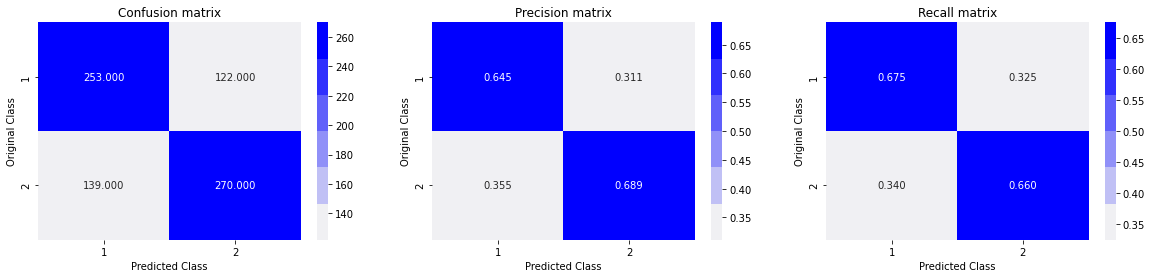

In [111]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusionmatrix(y_test, predicted_y)

In [112]:
results = metrics.precision_recall_fscore_support(y_test, predicted_y)
accuracy = metrics.accuracy_score(y_test, predicted_y)

print("Precision: " , results[0][0])
print("Recall: ", results[1][0])
print("F1-score: ", results[2][0])
print("accuracy: ", accuracy)

Precision:  0.6454081632653061
Recall:  0.6746666666666666
F1-score:  0.6597131681877444
accuracy:  0.6670918367346939
